In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from netam import shmoof, noof

In [2]:
train_df, val_df = shmoof.load_shmoof_dataframes("/Users/matsen/data/shmoof_edges_11-Jan-2023_NoNode0_iqtree_K80+R_masked.csv") #, sample_count=5000)

In [3]:
kmer_length = 5
max_length = 410

train_dataset = shmoof.SHMoofDataset(train_df, kmer_length=kmer_length, max_length=max_length)
val_dataset = shmoof.SHMoofDataset(val_df, kmer_length=kmer_length, max_length=max_length)

print(f"we have {len(train_dataset)} training examples and {len(val_dataset)} validation examples")

we have 3622 training examples and 1378 validation examples


In [4]:
model = shmoof.SHMoofModel(train_dataset)
burrito = shmoof.NoofBurrito(train_dataset, val_dataset, model, batch_size=1024, learning_rate=0.5, l2_regularization_coeff=1e-6)
print("starting training...")
losses = burrito.train(epochs=10)
burrito.write_shmoof_output("_ignore/reshmoof")

starting training...
Epoch [1/10]	 Loss: 0.070335951	 Val Loss: 0.070478411
Epoch [2/10]	 Loss: 0.062252444	 Val Loss: 0.070285573
Epoch [3/10]	 Loss: 0.06166115	 Val Loss: 0.069860811
Epoch [4/10]	 Loss: 0.061142489	 Val Loss: 0.069132796
Epoch [5/10]	 Loss: 0.060629354	 Val Loss: 0.068450047
Epoch [6/10]	 Loss: 0.060175469	 Val Loss: 0.067994689
Epoch [7/10]	 Loss: 0.059962683	 Val Loss: 0.067849105
Epoch [8/10]	 Loss: 0.059732854	 Val Loss: 0.067664673
Epoch [9/10]	 Loss: 0.059643983	 Val Loss: 0.067525459
Epoch [10/10]	 Loss: 0.059552024	 Val Loss: 0.067472778


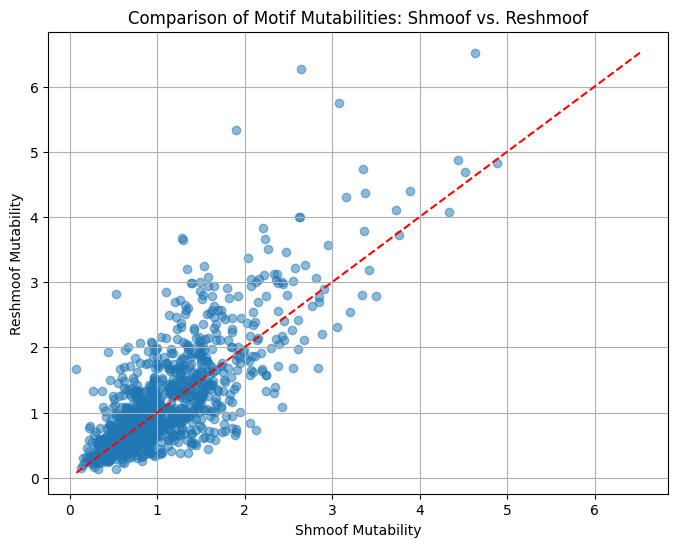

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load motif mutabilities
shmoof_motifs = pd.read_csv('_ignore/original_shmoof/mutabilities_context.tsv', sep='\t')
reshmoof_motifs = pd.read_csv('_ignore/reshmoof/motif_mutabilities.tsv', sep='\t')

# Merge dataframes
merged_motifs = pd.merge(shmoof_motifs, reshmoof_motifs, on='Motif', how='inner', suffixes=('_shmoof', '_reshmoof'))

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(merged_motifs['Mutability_shmoof'], merged_motifs['Mutability_reshmoof'], alpha=0.5)

# Determine bounds for y=x line
min_bound = min(merged_motifs['Mutability_shmoof'].min(), merged_motifs['Mutability_reshmoof'].min())
max_bound = max(merged_motifs['Mutability_shmoof'].max(), merged_motifs['Mutability_reshmoof'].max())

# Add y=x line
plt.plot([min_bound, max_bound], [min_bound, max_bound], 'r--')

plt.xlabel('Shmoof Mutability')
plt.ylabel('Reshmoof Mutability')
plt.title('Comparison of Motif Mutabilities: Shmoof vs. Reshmoof')
plt.grid(True)
plt.show()

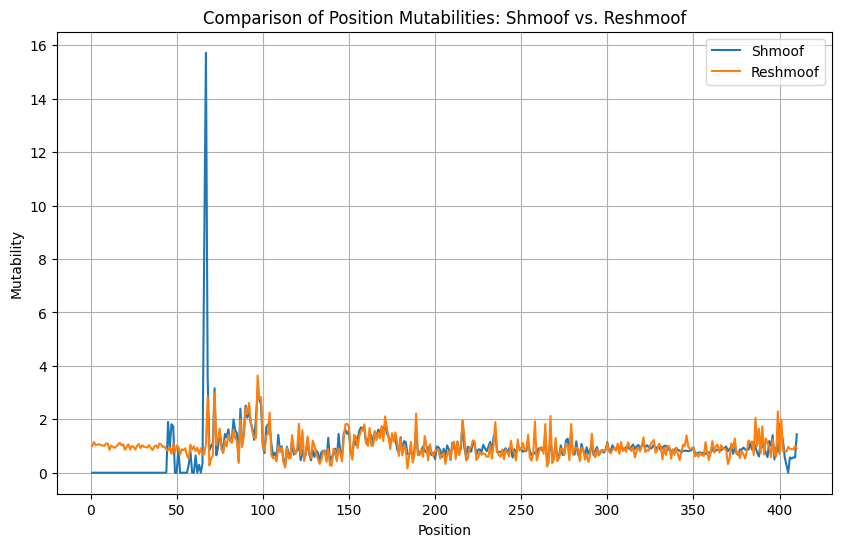

In [7]:
# Load position mutabilities
shmoof_positions = pd.read_csv('_ignore/original_shmoof/mutabilities_position.tsv', sep='\t')
reshmoof_positions = pd.read_csv('_ignore/reshmoof/site_mutabilities.tsv', sep='\t')

# Merge dataframes
merged_positions = pd.merge(shmoof_positions, reshmoof_positions, on='Position', suffixes=('_shmoof', '_reshmoof'))
merged_positions.sort_values(by='Position', inplace=True)

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(merged_positions['Position'], merged_positions['Mutability_shmoof'], label='Shmoof')
plt.plot(merged_positions['Position'], merged_positions['Mutability_reshmoof'], label='Reshmoof')
plt.xlabel('Position')
plt.ylabel('Mutability')
plt.title('Comparison of Position Mutabilities: Shmoof vs. Reshmoof')
plt.legend()
plt.grid(True)
plt.show()


Training with regularization coefficient 0
Epoch [1/20]	 Loss: 0.081452721	 Val Loss: 0.080956919
Epoch [2/20]	 Loss: 0.069816133	 Val Loss: 0.074180813
Epoch [3/20]	 Loss: 0.064798643	 Val Loss: 0.070918213
Epoch [4/20]	 Loss: 0.062462251	 Val Loss: 0.06947635
Epoch [5/20]	 Loss: 0.061295753	 Val Loss: 0.06875622
Epoch [6/20]	 Loss: 0.060631375	 Val Loss: 0.068315681
Epoch [7/20]	 Loss: 0.060193341	 Val Loss: 0.068030362
Epoch [8/20]	 Loss: 0.05991981	 Val Loss: 0.067861748
Epoch [9/20]	 Loss: 0.059747625	 Val Loss: 0.067738318
Epoch [10/20]	 Loss: 0.059615852	 Val Loss: 0.067652782
Epoch [11/20]	 Loss: 0.059504079	 Val Loss: 0.067548939
Epoch [12/20]	 Loss: 0.059431861	 Val Loss: 0.067479524
Epoch [13/20]	 Loss: 0.059388326	 Val Loss: 0.067422612
Epoch [14/20]	 Loss: 0.059356005	 Val Loss: 0.067381019
Epoch [15/20]	 Loss: 0.059337096	 Val Loss: 0.067359838
Epoch [16/20]	 Loss: 0.059314628	 Val Loss: 0.067337572
Epoch [17/20]	 Loss: 0.059300906	 Val Loss: 0.067325162
Epoch [18/20]	 Lo

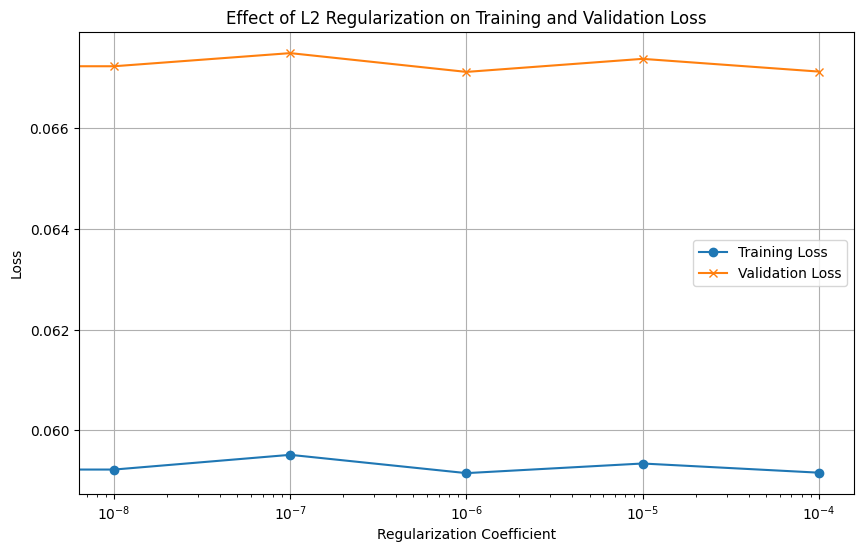

In [8]:
regularization_coeffs = [0, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
results = []

for coeff in regularization_coeffs:
    print(f"Training with regularization coefficient {coeff}")
    model = shmoof.SHMoofModel(train_dataset)
    burrito = shmoof.NoofBurrito(train_dataset, val_dataset, model, batch_size=1024, learning_rate=0.1, l2_regularization_coeff=1e-6)
    loss_history = burrito.train(epochs=20)
    final_training_loss = loss_history['training_losses'].iloc[-1]
    final_validation_loss = loss_history['validation_losses'].iloc[-1]

    results.append({
        'Regularization': coeff,
        'Final_Training_Loss': final_training_loss,
        'Final_Validation_Loss': final_validation_loss
    })

regularization_results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
plt.plot(regularization_results_df['Regularization'], regularization_results_df['Final_Training_Loss'], label='Training Loss', marker='o')
plt.plot(regularization_results_df['Regularization'], regularization_results_df['Final_Validation_Loss'], label='Validation Loss', marker='x')

plt.xscale('log')
plt.xlabel('Regularization Coefficient')
plt.ylabel('Loss')
plt.title('Effect of L2 Regularization on Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
